<a href="https://colab.research.google.com/github/kevinsen-git/TF_Basics/blob/main/03_Modelling_Medical_Cost_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Modelling Medical Cost data
Lets do a regression anlaysis - from a Kaggle Dataset 

Dataset Description and Download 
https://www.kaggle.com/mirichoi0218/insurance/activity

Gitub url for direct download
https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

A good Analysis based on R 
https://www.kaggle.com/goksunazlican/analysis-of-medical-cost-personal-datasets

A cracker based on Python - must read 
https://www.kaggle.com/asifpervezpolok/insurance-cost-prediction-88-1-r2-score

Lots of cool Graphics 
Lots of cool stats analysis 
Standard models 
Uses SikitLearn 



In [19]:
# Standadrd Imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 


In [ ]:
#https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


In [9]:
insurance["age"], insurance["sex"]
# Note the type object 

(0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64, 0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object)

## One Hot Encoding 
### Categorical / Ordinal Variables 
This affects correlation calculations
For numeric to numeric use Speraman's Correlation 
For Categorical to Numeric use polyserial correlations
For Categorical to Categorical use polychoric correlations 

In [15]:
# Need to turn all the categorical variables into numerics
# One way is to use one hot encodeing 
# Can use from sklearn.preprocessing import OneHotEncoder
# OR pandas get_dummies
insurance_onehot=pd.get_dummies(insurance)
insurance_onehot

# A few things to note
# It does ALL the categorical columns automatically 
# It add the one hot encoded columns at the end 
# It automatically removes the original variable 
# Had 7 columns - sex = 2 region = 4 smoker = 2 = 8 new - take away 3 original - 5 new - now 12 columns
#
# Also note the index column - may have to remove that before passing to neural network ?
# Check the impact of above ? 



,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


## Prepare training and test data
### Drop charges from main data frame to make X 
### Just take charges from main data set to make y 


In [18]:
X = insurance_onehot.drop("charges", axis=1)
y = insurance_onehot["charges"]
# Note the [] to reference an element  and () to reference a funMBction 
X.head(), y.head()
# X = feature matrix, y = label vector 

(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns], 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [27]:
# Scikit Learn sklearn.model_selection.train_test_split 
from sklearn.model_selection import train_test_split
# The split ration is "how much to leave for testing" - so 0.3 meane 30% 
# Also set the random state so everything is reproducable o/w it will differ from run to run 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head(), X_test.head(), y_train.head(), y_test.head())
print(X_train.count(),X_test.count(),y_train.count(),y_test.count())
print(len(X_train),len(X_test),len(y_train), len(y_test))



      age    bmi  ...  region_southeast  region_southwest
560    46  19.95  ...                 0                 0
1285   47  24.32  ...                 0                 0
1142   52  24.86  ...                 1                 0
969    39  34.32  ...                 1                 0
486    54  21.47  ...                 0                 0

[5 rows x 11 columns]       age     bmi  ...  region_southeast  region_southwest
764    45  25.175  ...                 0                 0
887    36  30.020  ...                 0                 0
890    64  26.885  ...                 0                 0
1293   46  25.745  ...                 0                 0
259    19  31.920  ...                 0                 0

[5 rows x 11 columns] 560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64 764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: 

In [40]:
# Create , Compile, Fit and Predict  

# 1. Create the model 
tf.random.set_seed(42)
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model 
insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mae"])

# 3. Fit the model 
history=insurance_model_1.fit(X_train, y_train, epochs=100)

# Note Pandas is built on top of numpy 
# So our pandas datafraem is just a big numpy array
# tf and numpy play well together 
# so no conversion required it just converted pandas -> numpy -> tf ! 

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [41]:
# Check the results on the test data 
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [42]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Text(0, 0.5, 'epochs')

<Figure size 2880x2880 with 0 Axes>

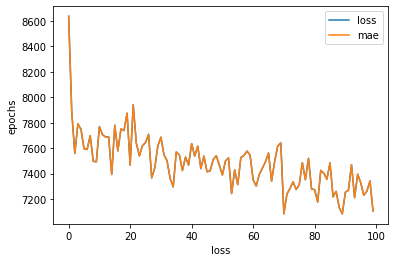

In [49]:
# Lets plot the history or training cureve or loss curve
#history.history
plt.figure(figsize=(40,40))
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")
